In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [0]:
noise = np.random.randn(len(x_data))

In [8]:
noise.shape

(1000000,)

y = mx+b

b = 5

In [0]:
y_true = (0.5 * x_data) + 5 + noise

In [0]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_true, columns=['Y'])

my_data = pd.concat([x_df, y_df], axis=1)

In [13]:
my_data.head()

,X Data,Y
0,0.00000,4.179189
1,0.00001,3.763077
2,0.00002,3.326186
3,0.00003,5.118927
4,0.00004,5.823266


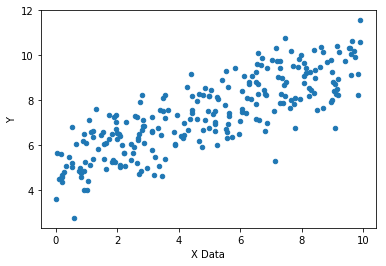

In [14]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [0]:
batch_size = 8

In [16]:
np.random.randn(2)

array([-0.57697964,  0.05869903])

In [0]:
m = tf.Variable(-0.57)
b = tf.Variable(0.058)

In [0]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [0]:
y_model = m*xph + b

In [0]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

train = optimizer.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  
  sess.run(init)
  
  batches = 10000
  
  for i in range(batches):
    
    rand_ind = np.random.randint(len(x_data), size=batch_size)
    
    feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
    
    sess.run(train, feed_dict = feed)
    
    model_m, model_b = sess.run([m, b])

In [32]:
model_m

0.4864387

In [33]:
model_b

5.002097

In [0]:
y_hat = x_data*model_m + model_b

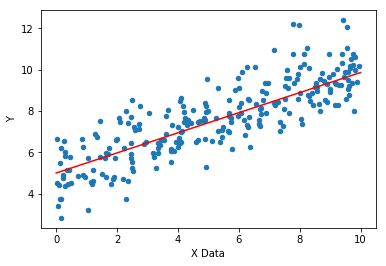

In [35]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')

In [0]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [37]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp174e3rz_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa4314a36d8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [43]:
X_test.shape

(300000,)

In [0]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': X_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [0]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': X_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [0]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x': X_test}, y_test, batch_size=8, num_epochs=1000, shuffle=False)

In [47]:
estimator.train(input_fn=input_func, steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp174e3rz_/model.ckpt.
INFO:tensorflow:loss = 427.08148, step = 1
INFO:tensorflow:global_step/sec: 663.243
INFO:tensorflow:loss = 74.74206, step = 101 (0.153 sec)
INFO

In [49]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-09-15T08:04:17Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmp174e3rz_/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-09-15-08:04:18
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.098393, global_step = 1000, label/mean = 7.50446, loss = 8.787144, prediction/

In [50]:
eval_metrics = estimator.evaluate(input_fn=test_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-09-15T08:05:00Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp174e3rz_/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-09-15-08:05:01
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.087416, global_step = 1000, label/mean = 7.4910502, loss = 8.699328, prediction/mean = 7.3493657
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100

In [51]:
print('Training metrics')
print(train_metrics)

Training metrics
{'average_loss': 1.098393, 'label/mean': 7.50446, 'loss': 8.787144, 'prediction/mean': 7.370494, 'global_step': 1000}


In [52]:
print('Test metrics')
print(eval_metrics)

Test metrics
{'average_loss': 1.087416, 'label/mean': 7.4910502, 'loss': 8.699328, 'prediction/mean': 7.3493657, 'global_step': 1000}


In [0]:
unseen_data = np.linspace(0, 10, 10)

input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': unseen_data}, shuffle=False)

In [56]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp174e3rz_/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.444461], dtype=float32)},
 {'predictions': array([5.094399], dtype=float32)},
 {'predictions': array([5.744337], dtype=float32)},
 {'predictions': array([6.3942747], dtype=float32)},
 {'predictions': array([7.0442133], dtype=float32)},
 {'predictions': array([7.694151], dtype=float32)},
 {'predictions': array([8.3440895], dtype=float32)},
 {'predictions': array([8.994027], dtype=float32)},
 {'predictions': array([9.643966], dtype=float32)},
 {'predictions': array([10.293903], dtype=float32)}]

In [58]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
  predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp174e3rz_/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [59]:
predictions

[array([4.444461], dtype=float32),
 array([5.094399], dtype=float32),
 array([5.744337], dtype=float32),
 array([6.3942747], dtype=float32),
 array([7.0442133], dtype=float32),
 array([7.694151], dtype=float32),
 array([8.3440895], dtype=float32),
 array([8.994027], dtype=float32),
 array([9.643966], dtype=float32),
 array([10.293903], dtype=float32)]

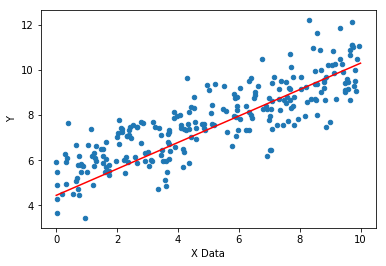

In [61]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(unseen_data, predictions, 'r')